In [36]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("Fish_dataset.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [39]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


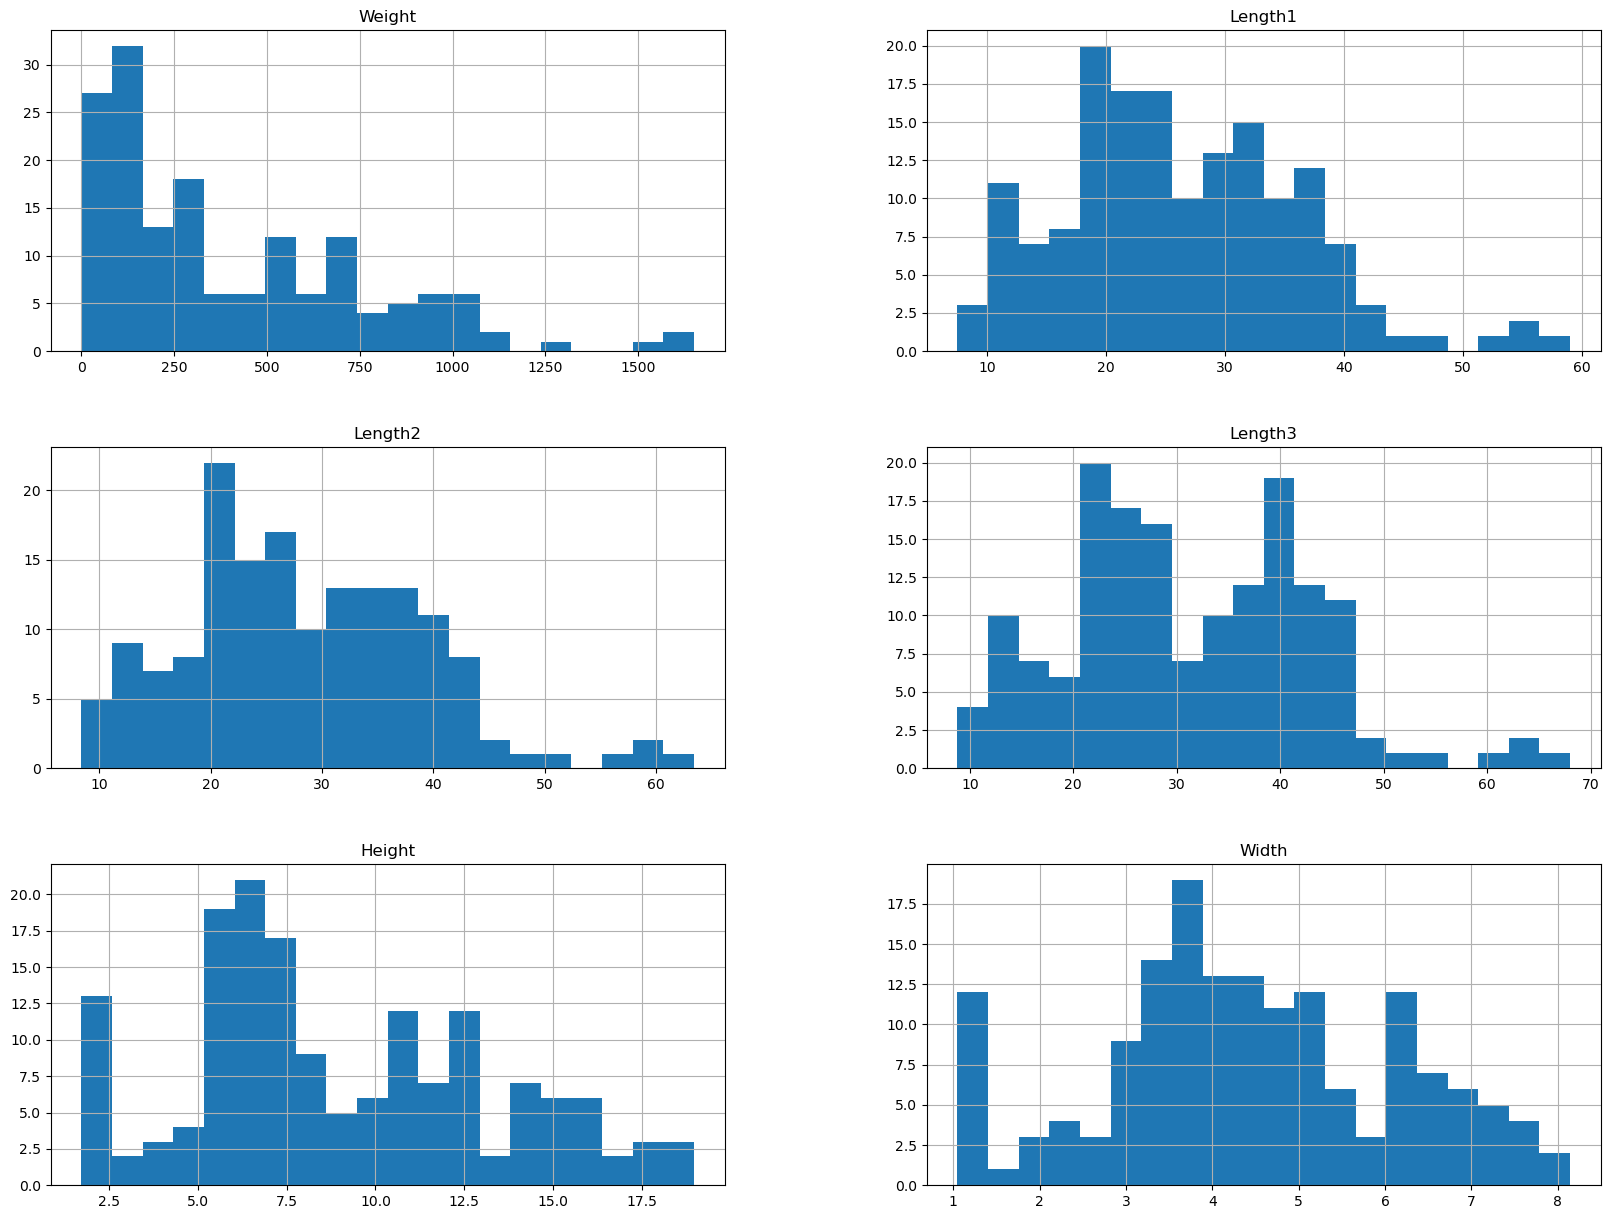

In [40]:
df.hist(bins = 20, figsize = (20,15))
plt.show()

In [41]:
species_counts=df['Species'].value_counts()

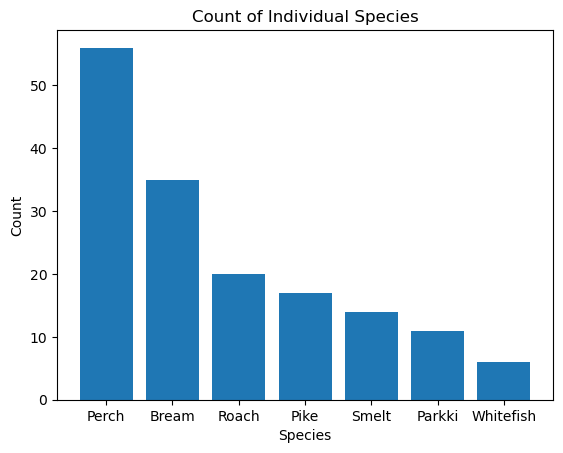

In [42]:
plt.bar(species_counts.index, species_counts.values)

plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of Individual Species')

plt.show()

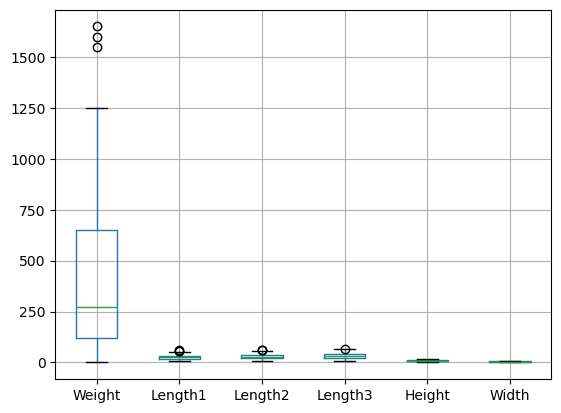

In [43]:
df.boxplot()
plt.show()

In [44]:
for x in df.columns[::]:              
    if df[x].dtype == object:
        continue
    else:
        q1 = df[x].quantile(q=0.25)
        q3 = df[x].quantile(q=0.75)
        IQR = q3-q1
        
        low = q1-1.5 *(IQR)
        high = q3+1.5*(IQR)
        ## dealing your outliers
        df.loc[(df[x]<low)|(df[x]>high)]=df[x].median()

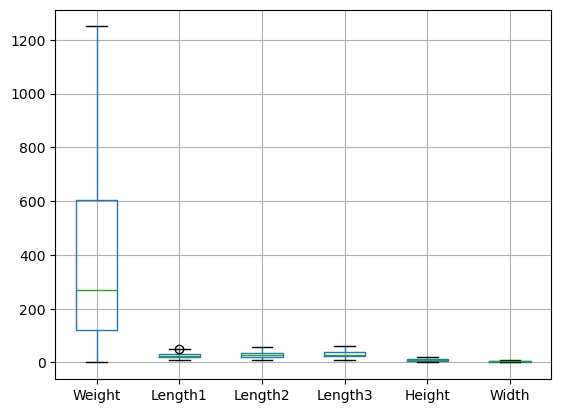

In [9]:
df.boxplot()
plt.show()

In [10]:
df = pd.get_dummies(df,drop_first = True)

In [11]:
df.shape

(159, 13)

In [12]:
x = df.drop('Species',axis = 1)
y = df['Weight']
x.shape

KeyError: "['Species'] not found in axis"

In [46]:
x= df["Length2"].values.reshape(-1,1)
y= df["Weight"].values

from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 40)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

y_p=LR.predict(x_test)
yp = LR.predict(x_train)

from sklearn.metrics import r2_score
train_r2=r2_score(y_train,yp)
test_r2=r2_score(y_test,y_p)

print("r2_train =",train_r2, "\nr2_test = ",test_r2)

r2_train = 0.795864282317293 
r2_test =  0.834790191391455


In [19]:
x= df[['Length1', 'Length2', 'Length3', 'Height', 'Width']].values
y= df["Weight"].values

from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 40)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

y_p=LR.predict(x_test)
yp= LR.predict(x_train)

from sklearn.metrics import r2_score
train_r2=r2_score(y_train,yp)
test_r2=r2_score(y_test,y_p)

print("r2_train =",train_r2, "\nr2_test = ",test_r2)

r2_train = 0.8987258939782927 
r2_test =  0.8860343336929509


In [15]:
df.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Bream', 'Species_Parkki', 'Species_Perch', 'Species_Pike',
       'Species_Roach', 'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [26]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(x_train,y_train)
y_p_lasso_train = lasso_reg.predict(x_train)
yp_lasso_train = lasso_reg.predict(x_test)

In [27]:
lasso_reg.score(x_test,y_test)

0.8398709997143894

In [28]:
lasso_reg.score(x_train,y_train)

0.8091102932674336

In [29]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(x_train,y_train)

Ridge()

In [30]:
ridge_reg.score(x_test,y_test)

0.8398273396360831

In [31]:
ridge_reg.score(x_train,y_train)

0.8091103838217535

In [32]:
from sklearn.linear_model import ElasticNet
En_reg = ElasticNet()
En_reg.fit(x_train,y_train)

ElasticNet()

In [33]:
En_reg.score(x_test,y_test)

0.8405623023302065

In [34]:
En_reg.score(x_train,y_train)

0.8090921788686561